In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load and view dataset
bike = pd.read_csv('bike_sharing_dataset.csv')
bike.tail()

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
2917,2018-12-27,3.500000,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,4280.0,5430.0,NaN
2918,2018-12-28,8.233333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,166.0,1959.0,2125.0,NaN
2919,2018-12-29,9.500000,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1756.0,4252.0,6008.0,NaN
2920,2018-12-30,4.800000,0.816667,11.066667,2.088889,0.104651,1.200000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1295.0,3634.0,4929.0,NaN
2921,2018-12-31,4.166667,0.250000,8.516667,4.444444,2.088235,1.466667,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,229.0,2172.0,2401.0,NaN


In [3]:
#View dataset characteristics
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2101 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             1503 non-null   float64
 8   wt_heavy_fog       208 non-null    float64
 9   wt_thunder         694 non-null    float64
 10  wt_sleet           129 non-null    float64
 11  wt_hail            50 non-null     float64
 12  wt_glaze           153 non-null    float64
 13  wt_haze            705 non-null    float64
 14  wt_drift_snow      7 non-null      float64
 15  wt_high_wind       258 non-null    float64
 16  wt_mist            371 n

In [4]:
bike.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,wt_sleet,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
count,2101.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,1503.0,208.0,694.0,129.0,...,5.0,84.0,36.0,10.0,4.0,1.0,2918.000000,2918.000000,2918.000000,89.0
mean,14.419007,8.506468,19.015689,11.069243,3.435734,3.162898,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1679.776217,6046.297121,7726.073338,1.0
std,9.556401,9.473941,9.835524,9.481232,8.183658,1.379582,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1560.762932,2756.888032,3745.220092,0.0
min,-12.100000,-16.993750,-7.980000,-15.658333,0.000000,0.375000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,19.000000,21.000000,1.0
25%,6.566667,0.516538,11.081562,3.013068,0.005510,2.200000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,512.250000,3839.250000,4628.500000,1.0
50%,15.433333,8.504911,19.992857,11.619091,0.271504,2.900000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1220.500000,5964.000000,7442.500000,1.0
75%,23.066667,17.338393,27.874583,19.767083,2.885381,3.875000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2357.250000,8187.500000,10849.500000,1.0
max,31.733333,26.206250,37.850000,28.666667,118.789796,12.750000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,10173.000000,15419.000000,19113.000000,1.0


In [5]:
#Fill null values in average temp column
bike['temp_avg'].fillna((bike['temp_min']+bike['temp_max'])/2, inplace=True)

In [6]:
#replace remainder null values with 0
bike.fillna(0, inplace=True)

In [7]:
#reset data types
bike[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail', 'wt_haze', 'wt_glaze', 'wt_drift_snow', 'wt_high_wind',
     'wt_mist', 'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog', 'wt_ice_fog', 'wt_freeze_drizzle',
     'wt_unknown', 'holiday']] = bike[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail', 'wt_haze', 'wt_glaze', 'wt_drift_snow', 'wt_high_wind',
     'wt_mist', 'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog', 'wt_ice_fog', 'wt_freeze_drizzle',
     'wt_unknown', 'holiday']].astype('category')

bike['date'] = bike['date'].astype('datetime64')

In [8]:
#Feature engineering to create a day of the week variable from the date column
bike['day_of_week'] = bike['date'].dt.day_name().astype('category')
col = bike['day_of_week']
bike.drop(labels=['day_of_week'], axis=1, inplace=True)
bike.insert(1, 'day_of_week', col)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2922 non-null   datetime64[ns]
 1   day_of_week        2922 non-null   category      
 2   temp_avg           2922 non-null   float64       
 3   temp_min           2922 non-null   float64       
 4   temp_max           2922 non-null   float64       
 5   temp_observ        2922 non-null   float64       
 6   precip             2922 non-null   float64       
 7   wind               2922 non-null   float64       
 8   wt_fog             2922 non-null   category      
 9   wt_heavy_fog       2922 non-null   category      
 10  wt_thunder         2922 non-null   category      
 11  wt_sleet           2922 non-null   category      
 12  wt_hail            2922 non-null   category      
 13  wt_glaze           2922 non-null   category      
 14  wt_haze 

In [9]:
#Rider characterization
percent_casual = bike['casual'].sum()/bike['total_cust'].sum()*100
percent_registered = bike['registered'].sum()/bike['total_cust'].sum()*100
print('The percentage of casual riders is', percent_casual.round(2),'%')
print('The percentage of registered riders is', percent_registered.round(2),'%')

The percentage of casual riders is 21.74 %
The percentage of registered riders is 78.26 %


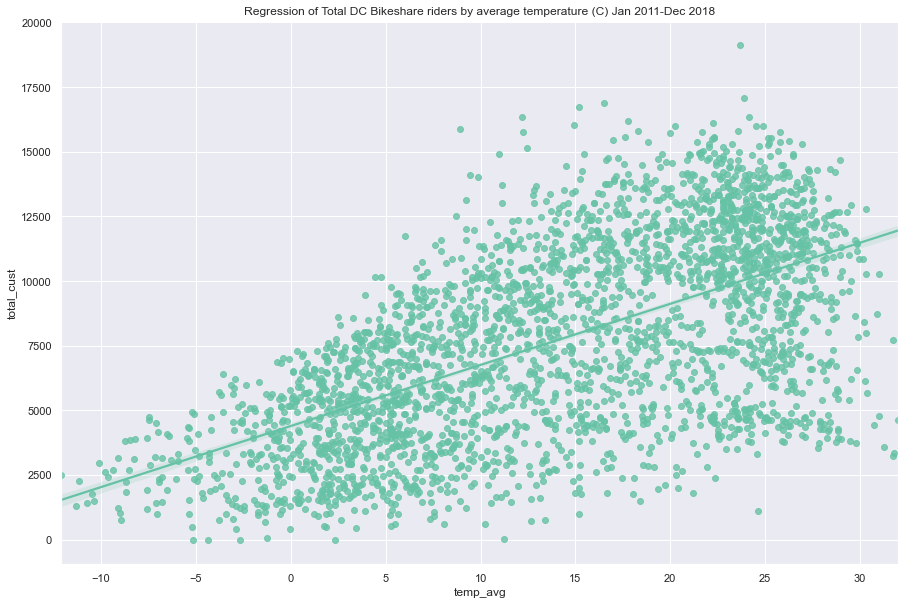

In [10]:
#Regressions of total customers by three common weather charcteristics - temperature, wind, and precipitation
sns.set_theme(style='darkgrid', palette='Set2')
fig = plt.figure(figsize=(15,10))
sns.regplot(data=bike, x='temp_avg', y='total_cust')
plt.title('Regression of Total DC Bikeshare riders by average temperature (C) Jan 2011-Dec 2018')
plt.savefig('Total DC Bikeshare riders by average temperature body.png')
plt.show()

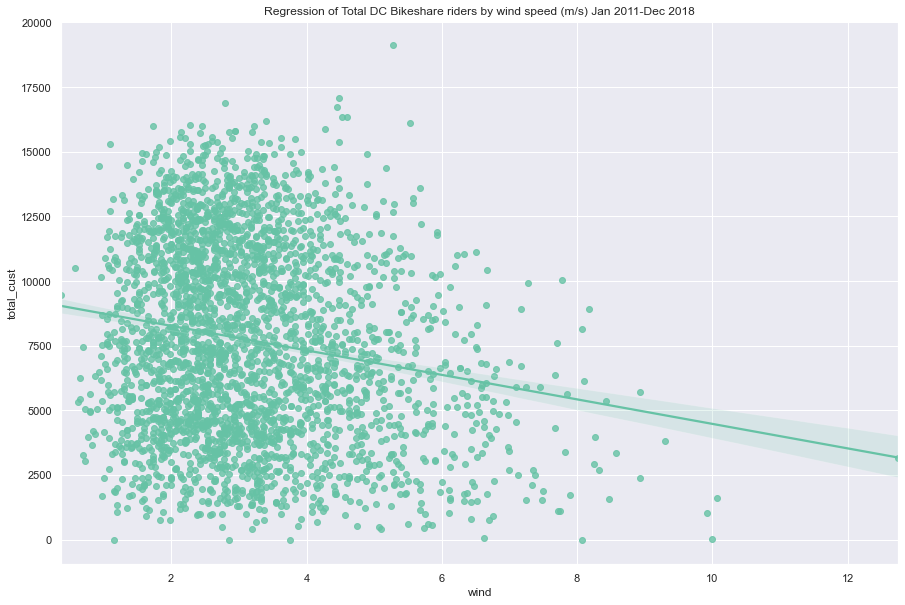

In [11]:
fig = plt.figure(figsize=(15,10))
sns.regplot(data=bike, x='wind', y='total_cust')
plt.title('Regression of Total DC Bikeshare riders by wind speed (m/s) Jan 2011-Dec 2018')
plt.savefig('Total DC Bikeshare riders by wind speed body.png')
plt.show()

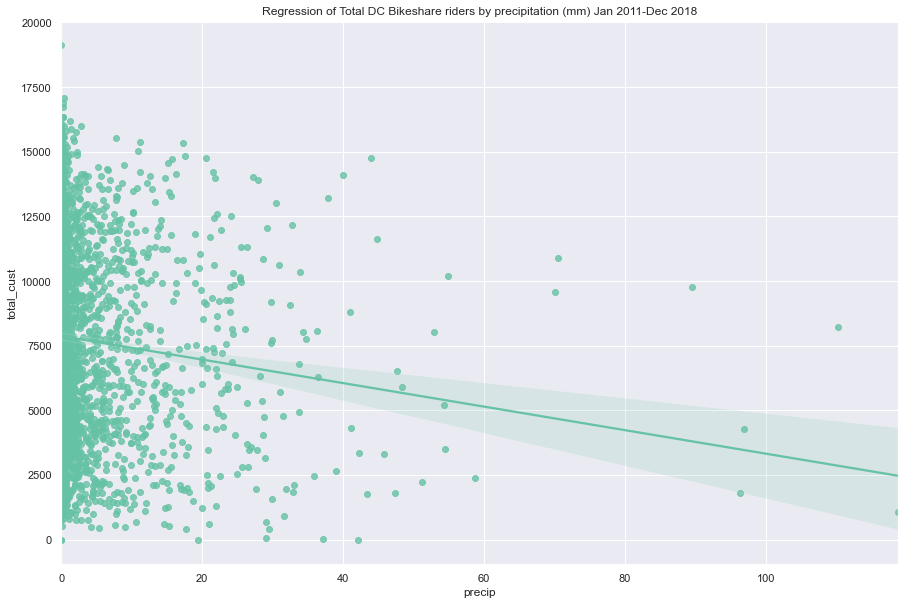

In [12]:
fig = plt.figure(figsize=(15,10))
sns.regplot(data=bike, x='precip', y='total_cust')
plt.title('Regression of Total DC Bikeshare riders by precipitation (mm) Jan 2011-Dec 2018')
#plt.xlim(0, 3)
plt.savefig('Total DC Bikeshare riders by precipitation (mm) body.png')
plt.show()

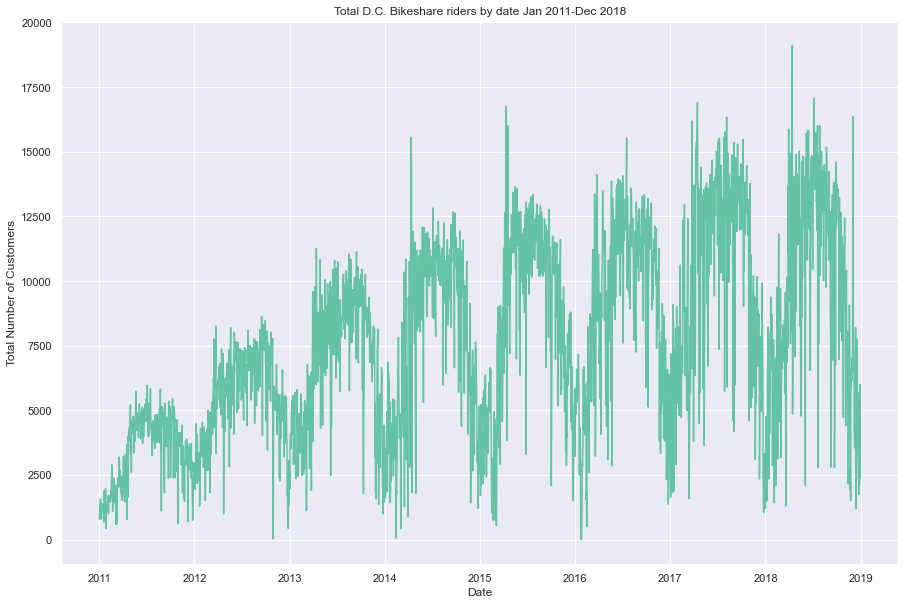

In [13]:
#Time series analysis ot total ridership
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=bike, x='date', y='total_cust')
plt.title('Total D.C. Bikeshare riders by date Jan 2011-Dec 2018')
plt.xlabel('Date')
plt.ylabel('Total Number of Customers')
plt.savefig('Total DC Bikeshre riders by date Jan 2011-Dec 2018.png')
plt.show()

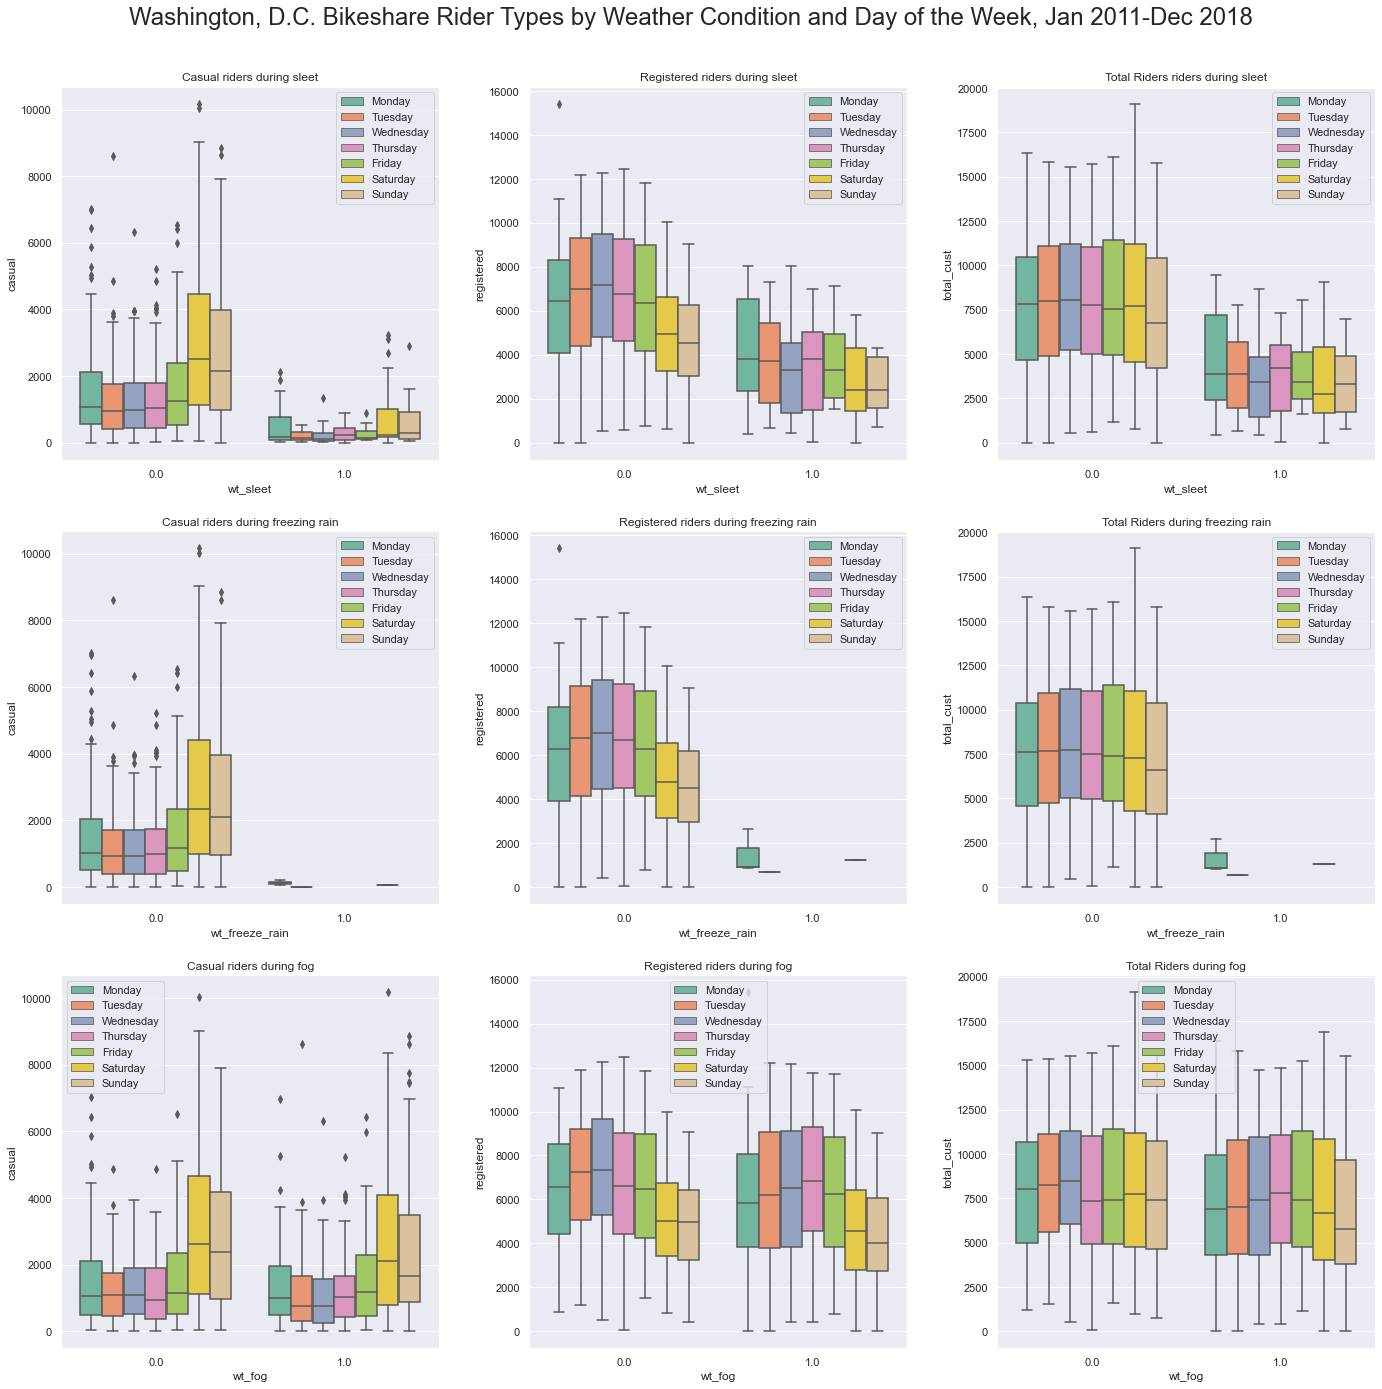

In [14]:
#distributions of ridership across days of the week, by weather event

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Washington, D.C. Bikeshare Rider Types by Weather Condition and Day of the Week, Jan 2011-Dec 2018', 
             fontsize=24)

sns.boxplot(ax=axes[0,0], data=bike, x='wt_sleet', y='casual', hue='day_of_week', hue_order=days)
axes[0,0].set_title('Casual riders during sleet')
axes[0,0].legend(loc='best')

sns.boxplot(ax=axes[0,1], data=bike, x='wt_sleet', y='registered', hue='day_of_week', hue_order=days)
axes[0,1].set_title('Registered riders during sleet')
axes[0,1].legend(loc='best')

sns.boxplot(ax=axes[0,2], data=bike, x='wt_sleet', y='total_cust', hue='day_of_week', hue_order=days)
axes[0,2].set_title('Total Riders riders during sleet')
axes[0,2].legend(loc='best')

sns.boxplot(ax=axes[1,0], data=bike, x='wt_freeze_rain', y='casual', hue='day_of_week', hue_order=days)
axes[1,0].set_title('Casual riders during freezing rain')
axes[1,0].legend(loc='best')

sns.boxplot(ax=axes[1,1], data=bike, x='wt_freeze_rain', y='registered', hue='day_of_week', hue_order=days)
axes[1,1].set_title('Registered riders during freezing rain')
axes[1,1].legend(loc='best')

sns.boxplot(ax=axes[1,2], data=bike, x='wt_freeze_rain', y='total_cust', hue='day_of_week', hue_order=days)
axes[1,2].set_title('Total Riders during freezing rain')
axes[1,2].legend(loc='best')

sns.boxplot(ax=axes[2,0], data=bike, x='wt_fog', y='casual', hue='day_of_week', hue_order=days)
axes[2,0].set_title('Casual riders during fog')
axes[2,0].legend(loc='best')

sns.boxplot(ax=axes[2,1], data=bike, x='wt_fog', y='registered', hue='day_of_week', hue_order=days)
axes[2,1].set_title('Registered riders during fog')
axes[2,1].legend(loc='best')

sns.boxplot(ax=axes[2,2], data=bike, x='wt_fog', y='total_cust', hue='day_of_week', hue_order=days)
axes[2,2].set_title('Total Riders during fog')
axes[2,2].legend(loc='upper center')

plt.tight_layout(h_pad=2.0, pad=3.0)
fig.savefig('Washington, D.C. Bikeshare Ridership by Weather Condition body.png')
plt.show()

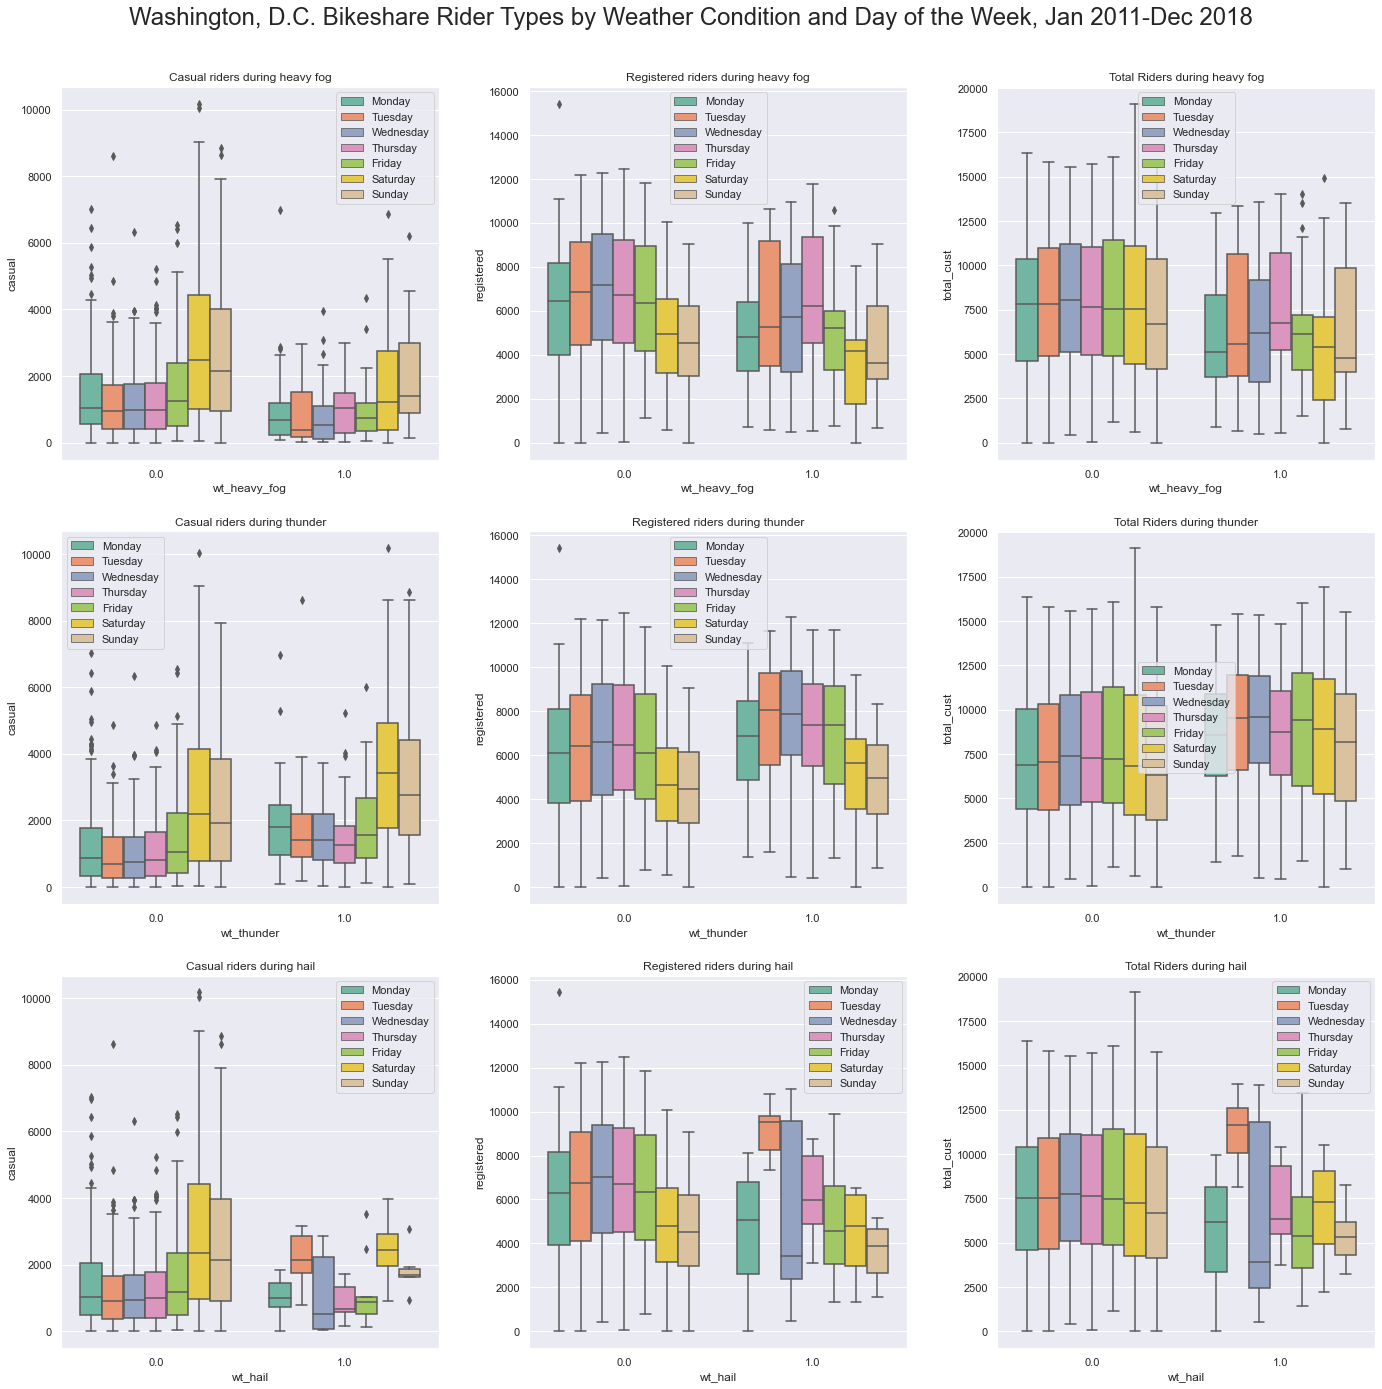

In [15]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Washington, D.C. Bikeshare Rider Types by Weather Condition and Day of the Week, Jan 2011-Dec 2018', 
             fontsize=24)

sns.boxplot(ax=axes[0,0], data=bike, x='wt_heavy_fog', y='casual', hue='day_of_week', hue_order=days)
axes[0,0].set_title('Casual riders during heavy fog')
axes[0,0].legend(loc='best')

sns.boxplot(ax=axes[0,1], data=bike, x='wt_heavy_fog', y='registered', hue='day_of_week', hue_order=days)
axes[0,1].set_title('Registered riders during heavy fog')
axes[0,1].legend(loc='best')

sns.boxplot(ax=axes[0,2], data=bike, x='wt_heavy_fog', y='total_cust', hue='day_of_week', hue_order=days)
axes[0,2].set_title('Total Riders during heavy fog')
axes[0,2].legend(loc='best')

sns.boxplot(ax=axes[1,0], data=bike, x='wt_thunder', y='casual', hue='day_of_week', hue_order=days)
axes[1,0].set_title('Casual riders during thunder')
axes[1,0].legend(loc='best')

sns.boxplot(ax=axes[1,1], data=bike, x='wt_thunder', y='registered', hue='day_of_week', hue_order=days)
axes[1,1].set_title('Registered riders during thunder')
axes[1,1].legend(loc='best')

sns.boxplot(ax=axes[1,2], data=bike, x='wt_thunder', y='total_cust', hue='day_of_week', hue_order=days)
axes[1,2].set_title('Total Riders during thunder')
axes[1,2].legend(loc='best')

sns.boxplot(ax=axes[2,0], data=bike, x='wt_hail', y='casual', hue='day_of_week', hue_order=days)
axes[2,0].set_title('Casual riders during hail')
axes[2,0].legend(loc='best')

sns.boxplot(ax=axes[2,1], data=bike, x='wt_hail', y='registered', hue='day_of_week', hue_order=days)
axes[2,1].set_title('Registered riders during hail')
axes[2,1].legend(loc='best')

sns.boxplot(ax=axes[2,2], data=bike, x='wt_hail', y='total_cust', hue='day_of_week', hue_order=days)
axes[2,2].set_title('Total Riders during hail')
axes[2,2].legend(loc='best')

plt.tight_layout(h_pad=2.0, pad=3.0)
fig.savefig('Washington, D.C. Bikeshare Ridership by Weather Condition appendix 1.png')
plt.show()

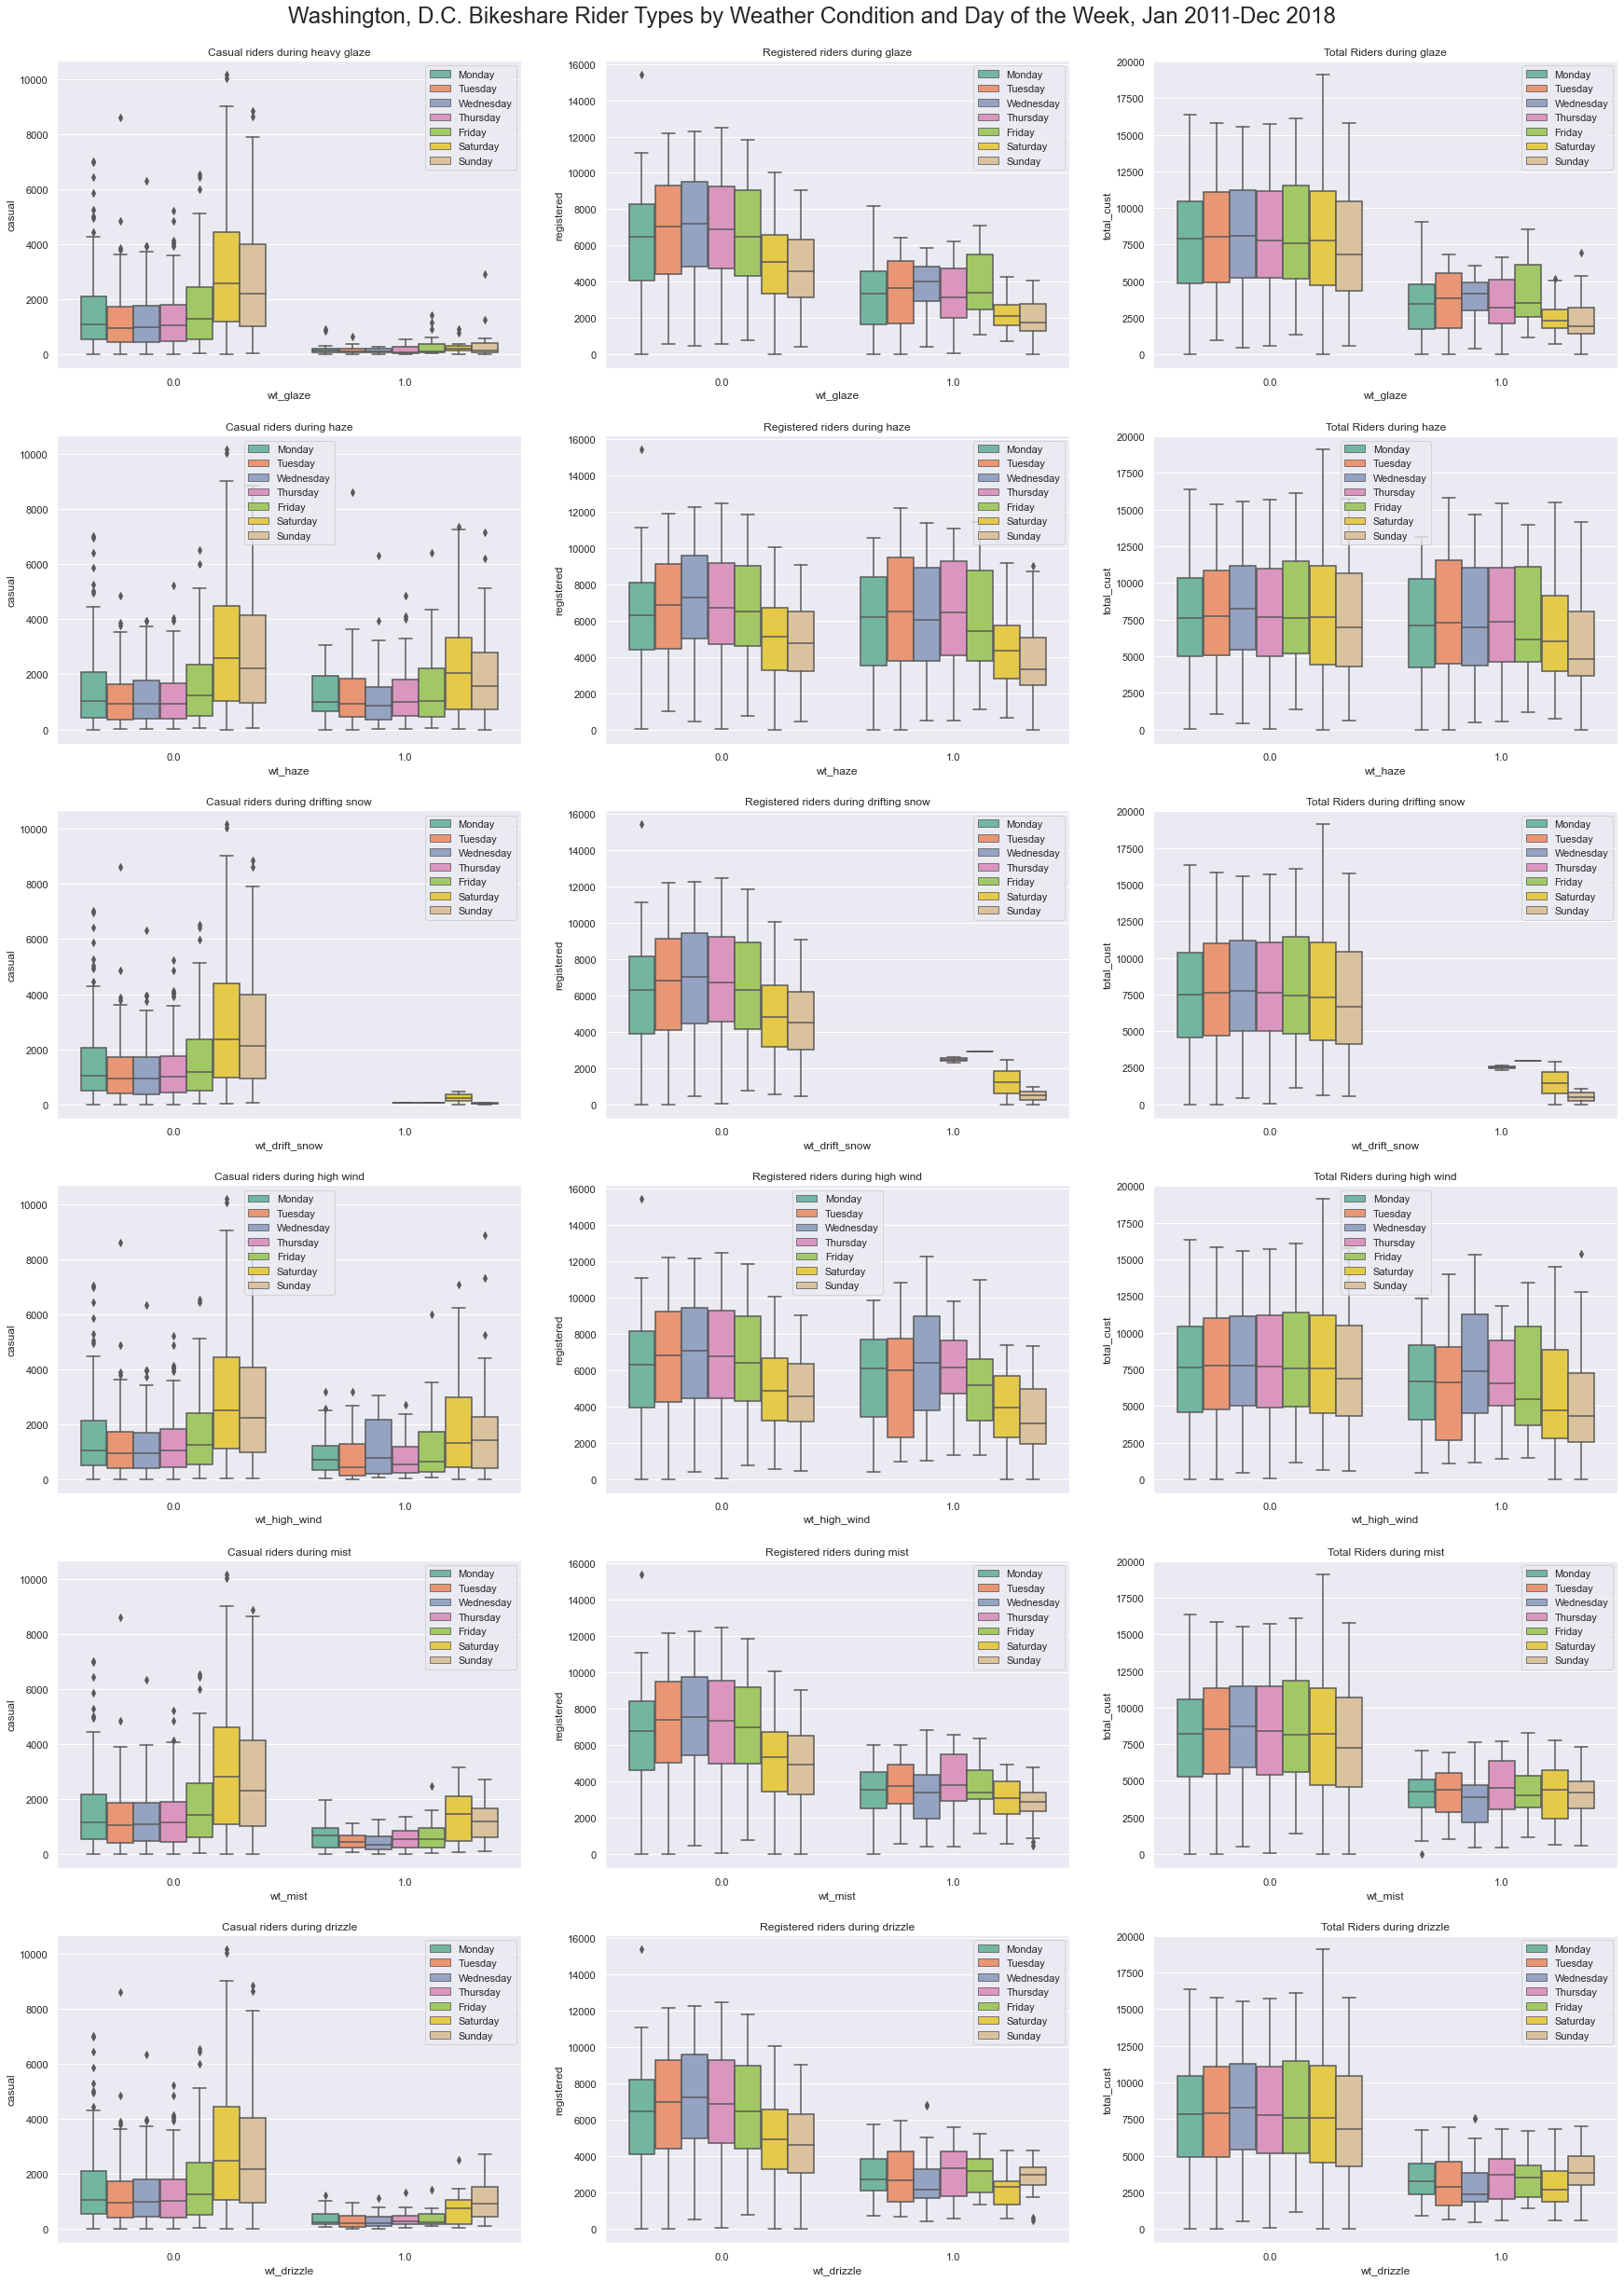

In [16]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig, axes = plt.subplots(6, 3, figsize=(25, 35))
fig.suptitle('Washington, D.C. Bikeshare Rider Types by Weather Condition and Day of the Week, Jan 2011-Dec 2018', 
             fontsize=24)

sns.boxplot(ax=axes[0,0], data=bike, x='wt_glaze', y='casual', hue='day_of_week', hue_order=days)
axes[0,0].set_title('Casual riders during heavy glaze')
axes[0,0].legend(loc='best')

sns.boxplot(ax=axes[0,1], data=bike, x='wt_glaze', y='registered', hue='day_of_week', hue_order=days)
axes[0,1].set_title('Registered riders during glaze')
axes[0,1].legend(loc='best')

sns.boxplot(ax=axes[0,2], data=bike, x='wt_glaze', y='total_cust', hue='day_of_week', hue_order=days)
axes[0,2].set_title('Total Riders during glaze')
axes[0,2].legend(loc='best')

sns.boxplot(ax=axes[1,0], data=bike, x='wt_haze', y='casual', hue='day_of_week', hue_order=days)
axes[1,0].set_title('Casual riders during haze')
axes[1,0].legend(loc='upper center')

sns.boxplot(ax=axes[1,1], data=bike, x='wt_haze', y='registered', hue='day_of_week', hue_order=days)
axes[1,1].set_title('Registered riders during haze')
axes[1,1].legend(loc='best')

sns.boxplot(ax=axes[1,2], data=bike, x='wt_haze', y='total_cust', hue='day_of_week', hue_order=days)
axes[1,2].set_title('Total Riders during haze')
axes[1,2].legend(loc='upper center')

sns.boxplot(ax=axes[2,0], data=bike, x='wt_drift_snow', y='casual', hue='day_of_week', hue_order=days)
axes[2,0].set_title('Casual riders during drifting snow')
axes[2,0].legend(loc='best')

sns.boxplot(ax=axes[2,1], data=bike, x='wt_drift_snow', y='registered', hue='day_of_week', hue_order=days)
axes[2,1].set_title('Registered riders during drifting snow')
axes[2,1].legend(loc='best')

sns.boxplot(ax=axes[2,2], data=bike, x='wt_drift_snow', y='total_cust', hue='day_of_week', hue_order=days)
axes[2,2].set_title('Total Riders during drifting snow')
axes[2,2].legend(loc='best')

sns.boxplot(ax=axes[3,0], data=bike, x='wt_high_wind', y='casual', hue='day_of_week', hue_order=days)
axes[3,0].set_title('Casual riders during high wind')
axes[3,0].legend(loc='upper center')

sns.boxplot(ax=axes[3,1], data=bike, x='wt_high_wind', y='registered', hue='day_of_week', hue_order=days)
axes[3,1].set_title('Registered riders during high wind')
axes[3,1].legend(loc='best')

sns.boxplot(ax=axes[3,2], data=bike, x='wt_high_wind', y='total_cust', hue='day_of_week', hue_order=days)
axes[3,2].set_title('Total Riders during high wind')
axes[3,2].legend(loc='best')

sns.boxplot(ax=axes[4,0], data=bike, x='wt_mist', y='casual', hue='day_of_week', hue_order=days)
axes[4,0].set_title('Casual riders during mist')
axes[4,0].legend(loc='best')

sns.boxplot(ax=axes[4,1], data=bike, x='wt_mist', y='registered', hue='day_of_week', hue_order=days)
axes[4,1].set_title('Registered riders during mist')
axes[4,1].legend(loc='best')

sns.boxplot(ax=axes[4,2], data=bike, x='wt_mist', y='total_cust', hue='day_of_week', hue_order=days)
axes[4,2].set_title('Total Riders during mist')
axes[4,2].legend(loc='best')

sns.boxplot(ax=axes[5,0], data=bike, x='wt_drizzle', y='casual', hue='day_of_week', hue_order=days)
axes[5,0].set_title('Casual riders during drizzle')
axes[5,0].legend(loc='best')

sns.boxplot(ax=axes[5,1], data=bike, x='wt_drizzle', y='registered', hue='day_of_week', hue_order=days)
axes[5,1].set_title('Registered riders during drizzle')
axes[5,1].legend(loc='best')

sns.boxplot(ax=axes[5,2], data=bike, x='wt_drizzle', y='total_cust', hue='day_of_week', hue_order=days)
axes[5,2].set_title('Total Riders during drizzle')
axes[5,2].legend(loc='best')

plt.tight_layout(h_pad=2.0, pad=3.0)
fig.savefig('Washington, D.C. Bikeshare Ridership by Weather Condition appendix 2.png')
plt.show()

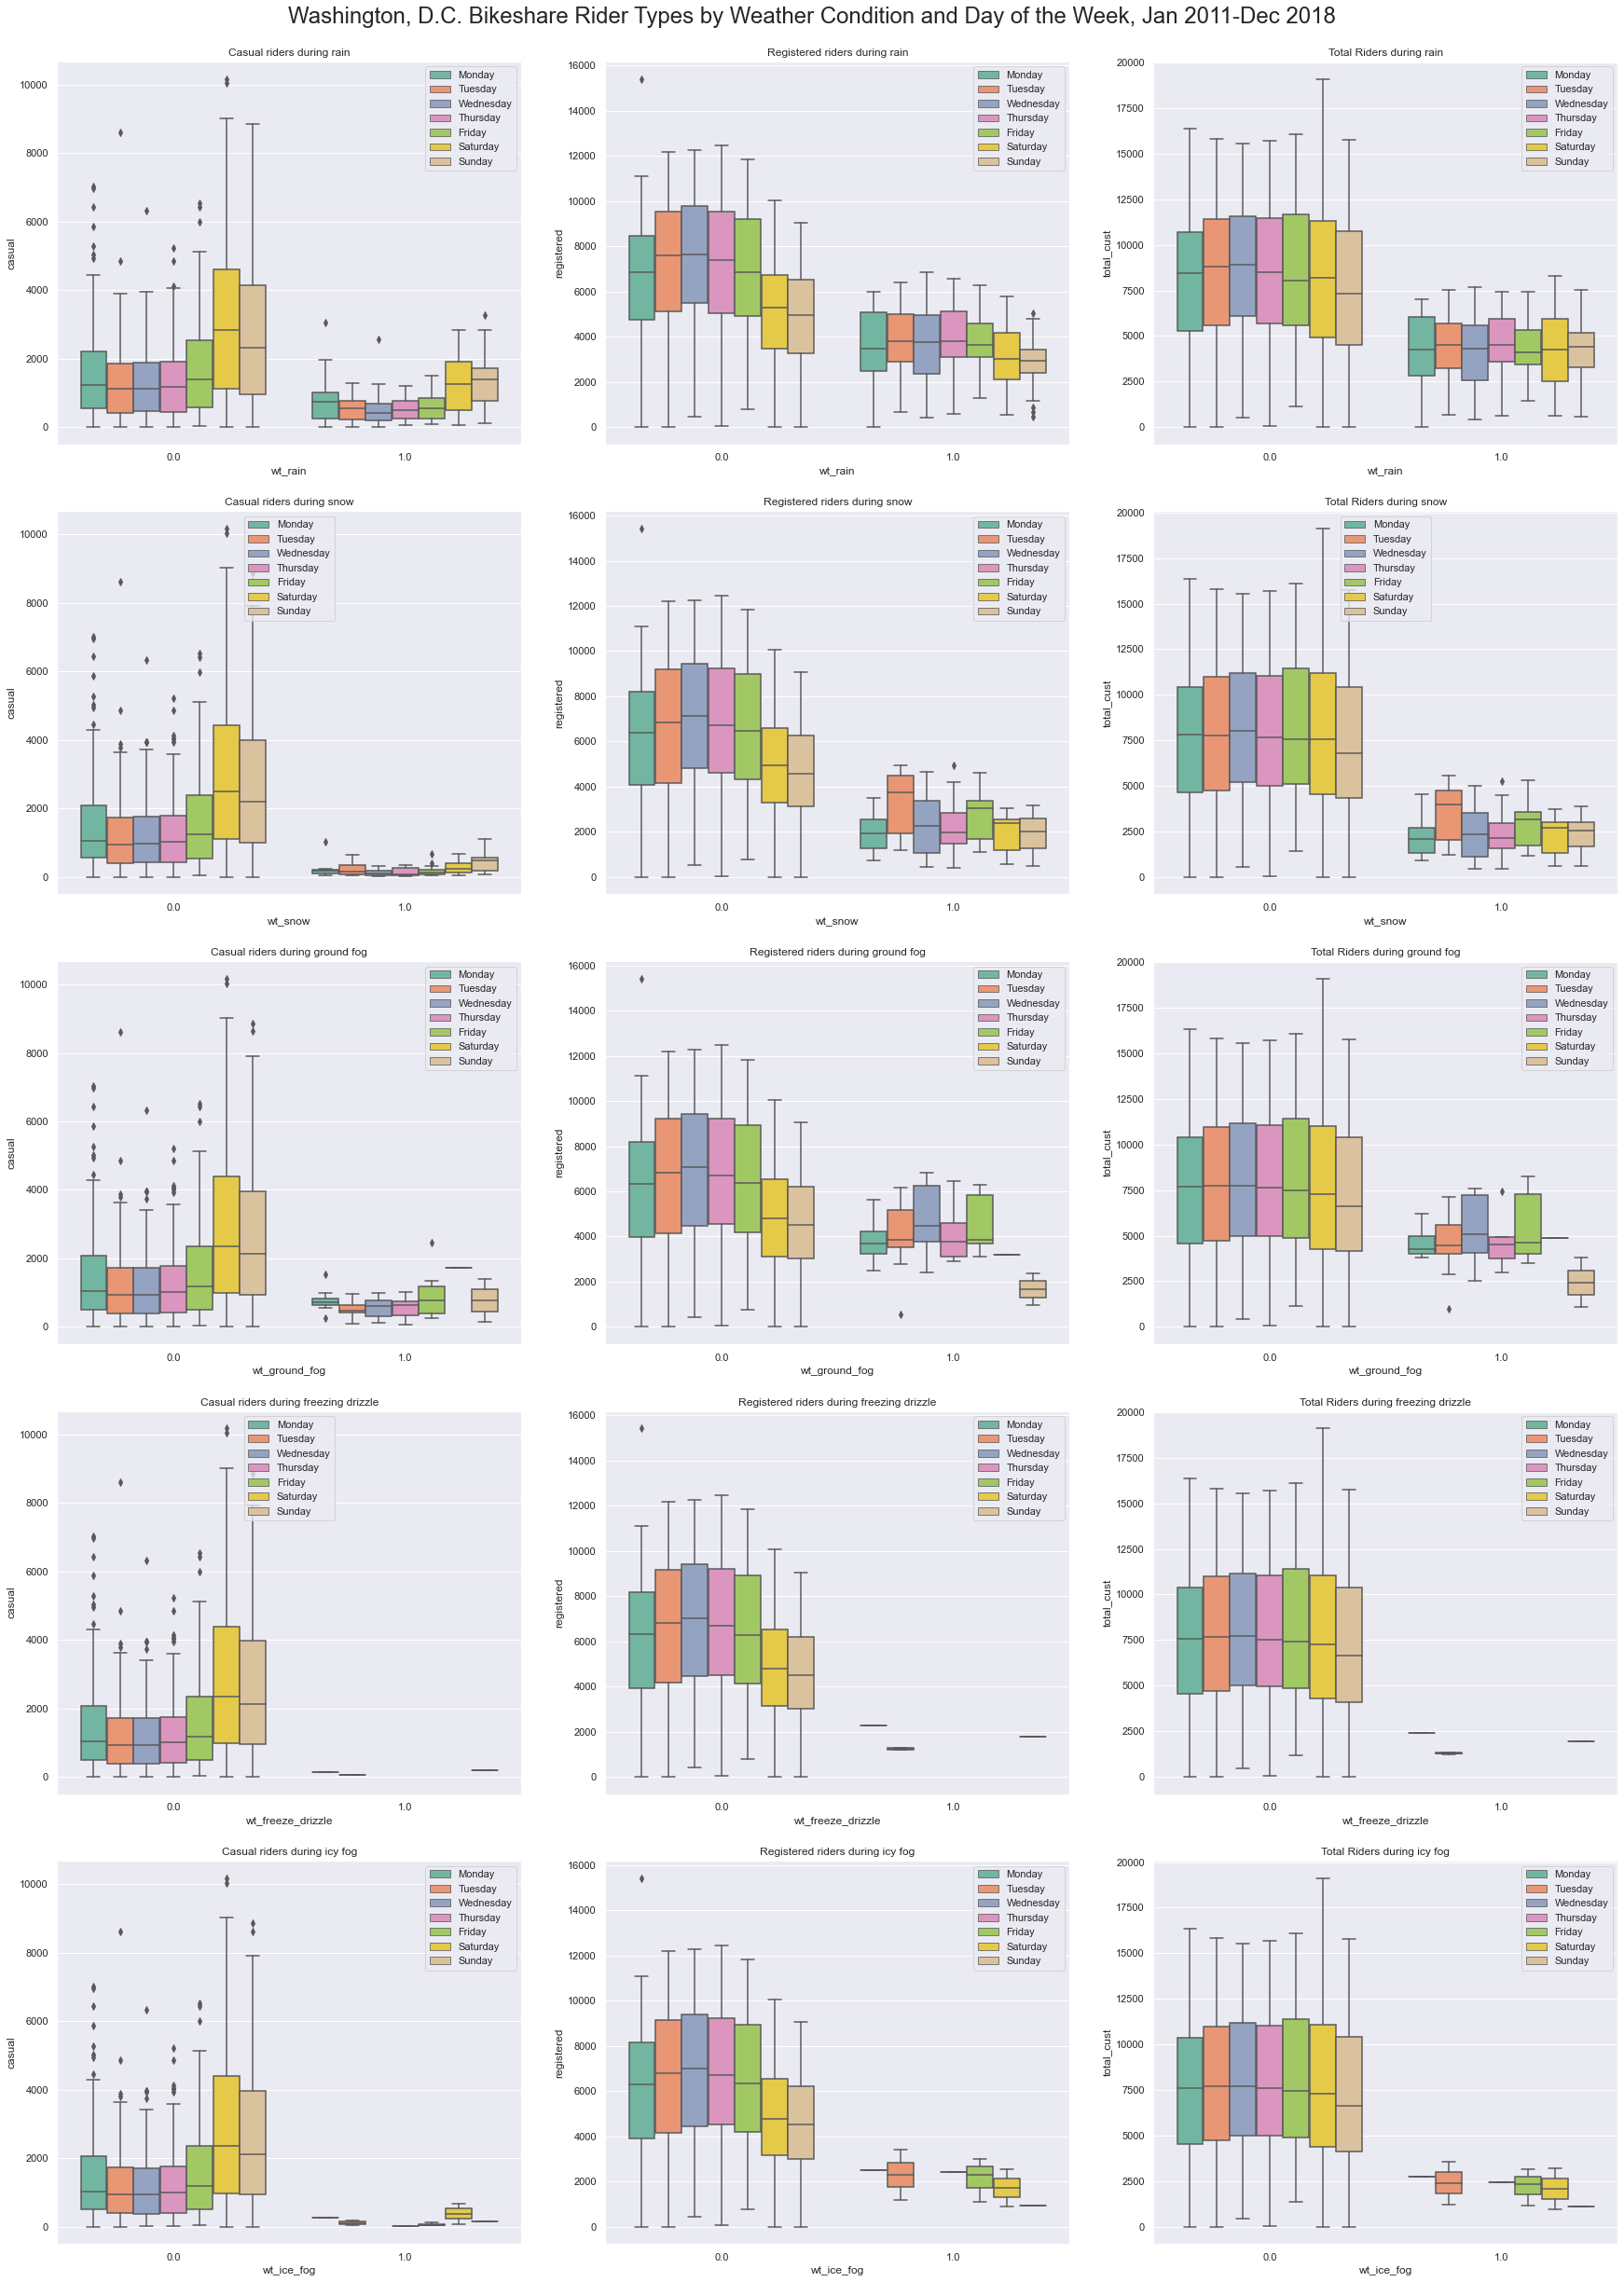

In [18]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig, axes = plt.subplots(5, 3, figsize=(25, 35))
fig.suptitle('Washington, D.C. Bikeshare Rider Types by Weather Condition and Day of the Week, Jan 2011-Dec 2018', 
             fontsize=24)

sns.boxplot(ax=axes[0,0], data=bike, x='wt_rain', y='casual', hue='day_of_week', hue_order=days)
axes[0,0].set_title('Casual riders during rain')
axes[0,0].legend(loc='best')

sns.boxplot(ax=axes[0,1], data=bike, x='wt_rain', y='registered', hue='day_of_week', hue_order=days)
axes[0,1].set_title('Registered riders during rain')
axes[0,1].legend(loc='best')

sns.boxplot(ax=axes[0,2], data=bike, x='wt_rain', y='total_cust', hue='day_of_week', hue_order=days)
axes[0,2].set_title('Total Riders during rain')
axes[0,2].legend(loc='best')

sns.boxplot(ax=axes[1,0], data=bike, x='wt_snow', y='casual', hue='day_of_week', hue_order=days)
axes[1,0].set_title('Casual riders during snow')
axes[1,0].legend(loc='upper center')

sns.boxplot(ax=axes[1,1], data=bike, x='wt_snow', y='registered', hue='day_of_week', hue_order=days)
axes[1,1].set_title('Registered riders during snow')
axes[1,1].legend(loc='best')

sns.boxplot(ax=axes[1,2], data=bike, x='wt_snow', y='total_cust', hue='day_of_week', hue_order=days)
axes[1,2].set_title('Total Riders during snow')
axes[1,2].legend(loc='upper center')

sns.boxplot(ax=axes[2,0], data=bike, x='wt_ground_fog', y='casual', hue='day_of_week', hue_order=days)
axes[2,0].set_title('Casual riders during ground fog')
axes[2,0].legend(loc='best')

sns.boxplot(ax=axes[2,1], data=bike, x='wt_ground_fog', y='registered', hue='day_of_week', hue_order=days)
axes[2,1].set_title('Registered riders during ground fog')
axes[2,1].legend(loc='best')

sns.boxplot(ax=axes[2,2], data=bike, x='wt_ground_fog', y='total_cust', hue='day_of_week', hue_order=days)
axes[2,2].set_title('Total Riders during ground fog')
axes[2,2].legend(loc='best')

sns.boxplot(ax=axes[3,0], data=bike, x='wt_freeze_drizzle', y='casual', hue='day_of_week', hue_order=days)
axes[3,0].set_title('Casual riders during freezing drizzle')
axes[3,0].legend(loc='upper center')

sns.boxplot(ax=axes[3,1], data=bike, x='wt_freeze_drizzle', y='registered', hue='day_of_week', hue_order=days)
axes[3,1].set_title('Registered riders during freezing drizzle')
axes[3,1].legend(loc='best')

sns.boxplot(ax=axes[3,2], data=bike, x='wt_freeze_drizzle', y='total_cust', hue='day_of_week', hue_order=days)
axes[3,2].set_title('Total Riders during freezing drizzle')
axes[3,2].legend(loc='best')

sns.boxplot(ax=axes[4,0], data=bike, x='wt_ice_fog', y='casual', hue='day_of_week', hue_order=days)
axes[4,0].set_title('Casual riders during icy fog')
axes[4,0].legend(loc='best')

sns.boxplot(ax=axes[4,1], data=bike, x='wt_ice_fog', y='registered', hue='day_of_week', hue_order=days)
axes[4,1].set_title('Registered riders during icy fog')
axes[4,1].legend(loc='best')

sns.boxplot(ax=axes[4,2], data=bike, x='wt_ice_fog', y='total_cust', hue='day_of_week', hue_order=days)
axes[4,2].set_title('Total Riders during icy fog')
axes[4,2].legend(loc='best')

plt.tight_layout(h_pad=2.0, pad=3.0)
fig.savefig('Washington, D.C. Bikeshare Ridership by Weather Condition appendix 3.png')
plt.show()